## Part1: Processing the data

In [ ]:
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
# !pip install git+https://github.com/medianeuroscience/emfdscore.git


### Import Required Python Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5

from statsmodels.iolib.summary2 import summary_col


# Disable warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
data1 = pd.read_csv('general_media_final_dataset.csv').drop('Unnamed: 0',axis=1)
data2 = pd.read_csv('final_science_media_data (1).csv').drop('Unnamed: 0',axis=1)

In [ ]:
data3 = pd.read_csv('2021-10-22-09-22-53-EDT-Historical-Report-BuzzFeed-2018-01-01--2021-07-01.csv',encoding = "ISO-8859-1").dropna()
data4 = pd.read_csv('2021-10-22-09-21-54-EDT-Historical-Report-The-Daily-Caller-2018-01-01--2021-07-01.csv',encoding = "ISO-8859-1").dropna()
data5 = pd.read_csv('2021-10-23-10-02-33-EDT-Historical-Report-Vox-2018-01-01--2021-07-01.csv',encoding = "ISO-8859-1").dropna()
data6 = pd.read_csv('2021-10-22-09-19-11-EDT-Historical-Report-Washington-Examiner-2018-01-01--2021-07-01.csv',encoding = "ISO-8859-1").dropna()

In [ ]:
data1.head(1)

In [ ]:
data2.head(1)

In [ ]:
data3.head(1)

### Keep Posts from **2020.1.1 to 2021.6.30**

In [ ]:
data1.dropna(inplace=True)
data2.dropna(inplace=True)
data3.dropna(inplace=True)
data4.dropna(inplace=True)
data5.dropna(inplace=True)
data6.dropna(inplace=True)

In [ ]:

"""
For the selection, we need first to turn the date column to DateTime Format(instead of string), we can do it using to_datetime method from pandas
library
"""
data1['Post Created Date'] = pd.to_datetime(data1['Post Created Date']) 
data2['Post Created Date'] = pd.to_datetime(data2['Post Created Date']) 
data3['Post Created Date'] = pd.to_datetime(data3['Post Created Date']) 
data4['Post Created Date'] = pd.to_datetime(data4['Post Created Date']) 
data5['Post Created Date'] = pd.to_datetime(data5['Post Created Date']) 
data6['Post Created Date'] = pd.to_datetime(data6['Post Created Date']) 

In [ ]:
"""
Now lets do the selection
"""
start_date = '2010.1.1'
end_date = '2021.6.30'
#greater than the start date and smaller than the end date
mask1 = (data1['Post Created Date'] > start_date) & (data1['Post Created Date'] <= end_date)
mask2 = (data2['Post Created Date'] > start_date) & (data2['Post Created Date'] <= end_date)
mask3 = (data3['Post Created Date'] > '2020.1.1') & (data3['Post Created Date'] <= '2021.6.30')
mask4 = (data4['Post Created Date'] > '2020.1.1') & (data4['Post Created Date'] <= '2021.6.30')
mask5 = (data5['Post Created Date'] > '2020.1.1') & (data5['Post Created Date'] <= '2021.6.30')
mask6 = (data6['Post Created Date'] > '2020.1.1') & (data6['Post Created Date'] <= '2021.6.30')
data1 = data1.loc[mask1]
data2 = data2.loc[mask2]
data3 = data3.loc[mask3]
data4 = data4.loc[mask4]
data5 = data5.loc[mask5]
data6 = data6.loc[mask6]

In [ ]:
"""
Now we will create a new column named LNC_category which means (liberal,neutral or conservative) based on user name.
"""
liberal = ['dailykos', 'nytimes', 'HuffingtonPostOfficial', 'washingtonpost', 'msnbc', 'bbc', 'cnn', 'nbc', 'NPR','Buzzfeed', 'Vox']
neutral = ['usatoday', 'nbc', 'Reuters', 'WSJ', 'ABCNetwork', 'CBS']
conservative = ['Breitbart','FoxNews','TheBlaze','Daily Caller', 'Washington examiner' ]

def match(username):
    if username in liberal:
        return 'liberal'
    elif username in neutral:
        return 'neutral'
    elif username in conservative:
        return 'conservative'
    else: return np.nan
data1['User Name'] = data1['User Name'].str.replace(' ', '')
data2['User Name'] = data2['User Name'].str.replace(' ', '')
data1['LNC_category']=data1['User Name'].apply(lambda x: match(x))
data2['LNC_category']=data2['User Name'].apply(lambda x: match(x))

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="LNC_category", data=data1)

In [ ]:
"""
Combine data1 with data2
"""
data2['User Name'] = data2['User Name'].apply(lambda x: 'science chennel')
data2['LNC_category'] = 'science'

data3['User Name'] = data3['User Name'].apply(lambda x: 'science chennel')
data3['LNC_category'] = 'science'

data4['User Name'] = data4['User Name'].apply(lambda x: 'science chennel')
data4['LNC_category'] = 'science'

data5['User Name'] = data4['User Name'].apply(lambda x: 'science chennel')
data5['LNC_category'] = 'liberal'


data6['User Name'] = data6['User Name'].apply(lambda x: 'science chennel')
data6['LNC_category'] = 'science'

In [ ]:
frames = [data1,data2,data3,data4,data5,data6]
data = pd.concat(frames)

In [ ]:
ax = sns.countplot(x="LNC_category", data=data)

### Select Covid-19 Topics

In [ ]:
data['Message'].iloc[0]

In [ ]:
list_covid = ['covid','Covid','Corona','Coronavirus','2019ncov','Ncov','Pandemic','Lockdown','Quarantine','SARS-CoV-2','N95','Social distancing']
def search(m):
  m = m.casefold()
  if any(srchstr.lower() in m.lower() for srchstr in list_covid):
    return 'covid'
  else:
    return 'NotCovid'
data['covid'] = data['Message'].apply(lambda x: search(x))

In [ ]:
ax = sns.countplot(x="covid", data=data)

In [ ]:
"""
Then we will select just covid data
"""
covid_data = data[data.covid=='covid']
covid_data.shape

## Part 2:  Conduct Sentiment Analysis

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
!pip install twython 

In [ ]:
len(covid_data.Message)

In [ ]:
!pip install textblob

In [ ]:

import warnings
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn import cluster



# Let's create our feature vector as Kmeans works with numerical values only
# thus we need to convert our text data into numeric features in some way which should 
# prove usful to our learning algorithm and it can easily find pattern in it.
# So, i will be using polarity score of the extracted adjectives as our feature

def create_polarity_vector(all_adjectives):
    # NLTK Vader sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    #Taking compound score as one feature, (compund score = -ve indicates negative sentiments)
    #(compund score = +ve indicates positive sentiments, ie compound value is normalization b/w +ve and -ve)
    feature_vector=[1 if sid.polarity_scores(i)['compound']>=0 else -1 for i in all_adjectives]
    
    return feature_vector


# utility function to read text file
def polarity_sets_file(input_file):
    with open(input_file, 'r') as f:
        input_text = f.read()
        return input_text

# utility function to extract all adjectives from text document
def extract_adjectives(text):
    tokenized_text= nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(tokenized_text)
    all_adjectives = list({i[0] for i in tagged_text if i[1] == 'JJ'})
    return all_adjectives

# Cleaning up text 
def clean_text(text):    
    
    #stopword removal
    stop_word=list(stopwords.words('english'))
    toke=list(text.split(' '))
    text = ' '.join([i for i in toke if i not in stop_word])
    
    #punctutaion removal
    t_lator=str.maketrans('','',string.punctuation)
    text=text.translate(t_lator)
    remove_digits = str.maketrans('', '', string.digits)
    text = text.translate(remove_digits)    
    
    #removing special symbol
    for i in '“”—':
        text = text.replace(i, ' ')
        
    return text
import time




with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    PN = []
    # covid_data = covid_data.sample(100)
    for i,text in enumerate(covid_data.Message):
      if i%100 == 0:
        print('{} message processed'.format(i))
      try:
        # Reading our file
        # text = polarity_sets_file('test.txt')
        # cleaning our text data
        text = clean_text(text)
        # Getting adjectieves from our document
        adjectives = extract_adjectives(text)
        # Preparing our feature vector
        features = create_polarity_vector(adjectives)
        # Making clusters using KMeans
        feature_ = np.array(features).reshape(-1,1)
        kmeans = cluster.KMeans(n_clusters=2)
        kmeans.fit(feature_)
        labels = kmeans.predict(feature_)

        # Identifying positive and negative terms

        type1_terms,type2_terms = [], []

        for i,j in zip(adjectives,labels):
            if j == 0 :
                type1_terms.append(i)
            else:
                type2_terms.append(i)
        if len(type1_terms) > len(type2_terms):
          PN.append('N')
        else:
          PN.append('P')

      except:
        PN.append(np.nan)
        continue

In [ ]:
"""
Postive/negative posts results
"""
covid_data['PN'] = PN
# PN = postive or negative
ax = sns.countplot(x="PN", data=covid_data)

In [ ]:
covid_data.to_csv('covid_data_final.csv',index=False)

In [ ]:
covid_data = pd.read_csv('covid_data_final.csv')

In [ ]:
"""
Relation between Postive/negative posts and journal type.
"""
sns.catplot(x="PN", hue="LNC_category", kind="count", data=covid_data)

In [ ]:
sns.catplot(x="PN",y="Likes", hue="LNC_category", kind="bar", data=covid_data)

In [ ]:
covid_data.columns

In [ ]:
from pandas.api.types import is_numeric_dtype
for col in ['Likes at Posting','Followers at Posting','Total Interactions','Likes','Comments','Shares','Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care']:
    if is_numeric_dtype(covid_data[col]):
        sns.catplot(x="PN",y=col, hue="LNC_category", kind="bar", data=covid_data)

## Part 3: Generate Moral Foundation Score

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
template_input = pd.DataFrame(data=covid_data.Message.values)
template_input.head()

In [ ]:
!git clone https://github.com/medianeuroscience/emfdscore.git

In [ ]:
!cp -R 'emfdscore/emfdscore' './score'

In [ ]:
from score.scoring import score_docs 

num_docs = len(template_input)

DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'sentiment'
OUT_CSV_PATH = 'all-sent.csv'

df = score_docs(template_input,DICT_TYPE,PROB_MAP,SCORE_METHOD,OUT_METRICS,num_docs)
df.to_csv(OUT_CSV_PATH, index=False)

In [ ]:
covid_data.shape

In [ ]:
DF_FINAL = pd.concat([covid_data.reset_index(drop=True),df.reset_index(drop=True)], axis=1)
DF_FINAL.head(2)

In [ ]:
DF_FINAL.to_csv('final.csv', index=False)

In [ ]:
DF_FINAL = pd.read_csv('final.csv')

## Part 4: Multilevel Regressions

### Import Packages and Prepare Data

In [41]:
df = pd.read_csv('final.csv', low_memory=False)
df.head()

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var
0,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 13:00:28 EDT,...,0.139355,0.085406,-0.121268,-0.095777,0.006735,-0.070749,-0.175241,0.777778,0.000574,0.004499
1,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 09:27:09 EDT,...,0.083956,0.093256,-0.120624,-0.086392,-0.081137,-0.065666,-0.057119,0.777778,0.000388,0.000599
2,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 09:15:16 EDT,...,0.068872,0.064272,-0.126078,-0.013716,-0.024528,0.061423,0.024422,1.166667,0.000080,0.004956
3,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 06:30:09 EDT,...,0.138231,0.069957,-0.225778,-0.271310,-0.171173,-0.157422,-0.168818,1.000000,0.000757,0.002340
4,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 00:32:08 EDT,...,0.099794,0.106860,-0.005410,-0.126836,0.119250,0.061201,-0.044982,0.750000,0.004427,0.009026


In [42]:
def generate_id(s):
    return abs(hash(s)) % (10 ** 10)

df.insert(0, "Post Id", df['Post Created'].apply(generate_id), True)

In [44]:
df.head()

,Post Id,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var
0,8256825272,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,0.139355,0.085406,-0.121268,-0.095777,0.006735,-0.070749,-0.175241,0.777778,0.000574,0.004499
1,1303087181,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,0.083956,0.093256,-0.120624,-0.086392,-0.081137,-0.065666,-0.057119,0.777778,0.000388,0.000599
2,6663459950,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,0.068872,0.064272,-0.126078,-0.013716,-0.024528,0.061423,0.024422,1.166667,0.000080,0.004956
3,5891787022,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,0.138231,0.069957,-0.225778,-0.271310,-0.171173,-0.157422,-0.168818,1.000000,0.000757,0.002340
4,1109243155,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,0.099794,0.106860,-0.005410,-0.126836,0.119250,0.061201,-0.044982,0.750000,0.004427,0.009026


In [45]:
word_count = []
split_string = df['Link Text'].str.split()
for string in split_string:
    words = len(string)
    word_count.append(words)     

In [46]:
df['word_count'] = word_count

In [47]:
df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])
df['Page Created'] = pd.to_datetime(df['Page Created'])


df['Post_Created_Month'] = df['Post Created Date'].dt.month
df['Page_Created_Month'] = df['Page Created'].dt.month

In [49]:
df2 = pd.DataFrame()

df2[["Post Id", 'Facebook Id','Post Created Date', 'care_p', 'fairness_p', 'loyalty_p','authority_p', 
         'sanctity_p', 'Likes', 'Comments', 'Angry', 'PN', 'LNC_category', 'Page Created', 'Type', 'Link Text', 'word_count','Followers_at_Posting',  'Post_Created_Month', 'Page_Created_Month']] = df[["Post Id", 'Facebook Id', 'Post Created Date', 'care_p', 'fairness_p', 'loyalty_p',
                                                        'authority_p', 'sanctity_p','Likes', 'Comments', 'Angry', 'PN', 'LNC_category', 'Page Created', 'Type', 'Link Text', 'word_count', 'Followers at Posting', 'Post_Created_Month', 'Page_Created_Month']]


df2.to_csv('working data.csv', index = False)

In [50]:
df2[["Post Id", "Link Text"]].to_csv("text.csv", index = False)

### Check the Distribution of Data

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84385 entries, 0 to 84384
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Facebook Id           84385 non-null  int64         
 1   Post Created Date     84385 non-null  datetime64[ns]
 2   care_p                84385 non-null  float64       
 3   fairness_p            84385 non-null  float64       
 4   loyalty_p             84385 non-null  float64       
 5   authority_p           84385 non-null  float64       
 6   sanctity_p            84385 non-null  float64       
 7   Likes                 84385 non-null  int64         
 8   Comments              84385 non-null  int64         
 9   Angry                 84385 non-null  int64         
 10  PN                    61463 non-null  object        
 11  LNC_category          84385 non-null  object        
 12  Page Created          84385 non-null  datetime64[ns]
 13  Type            

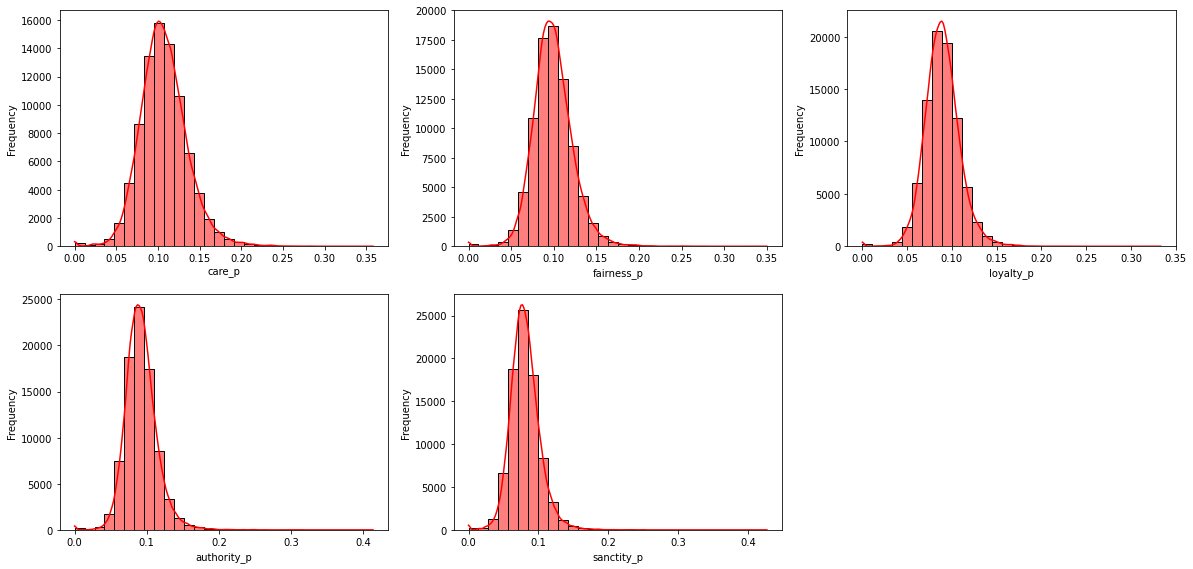

In [10]:
plt.figure(figsize=(20, 20))

for e, column in enumerate(['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p']):
    plt.subplot(4, 3, e + 1)
    sns.histplot(df[column],bins=30,color="r", kde=True)
    plt.ylabel('Frequency')

#### Compare care_p fairness_p loyalty_p authority_p sanctity_p across page category


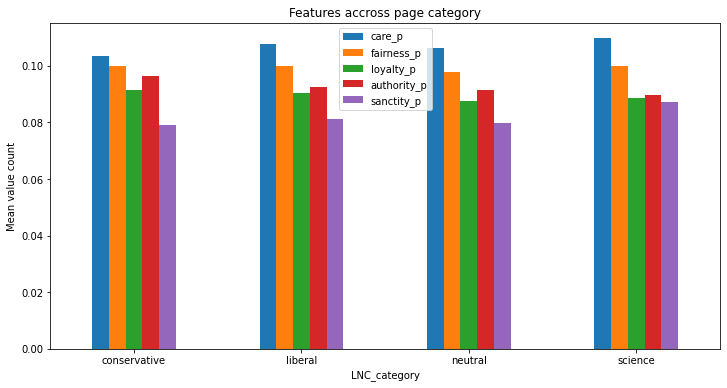

In [11]:
rcParams['figure.figsize'] = 12, 6
cateogry_plot=df2[['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 'LNC_category']].groupby('LNC_category').mean().plot(kind = 'bar')
plt.title('Features accross page category')
plt.ylabel('Mean value count')
plt.xticks(rotation = 360)
cateogry_plot;

In [12]:
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf


__Inferece:__ Taking log-transform normalization of all independent variables to handle highly skewed pattern.

In [13]:
df2['log_Likes'] = np.log(df2['Likes']+1)
df2['log_comments'] = np.log(df2['Comments']+1)
df2['log_Angry'] = np.log(df2['Angry']+1)

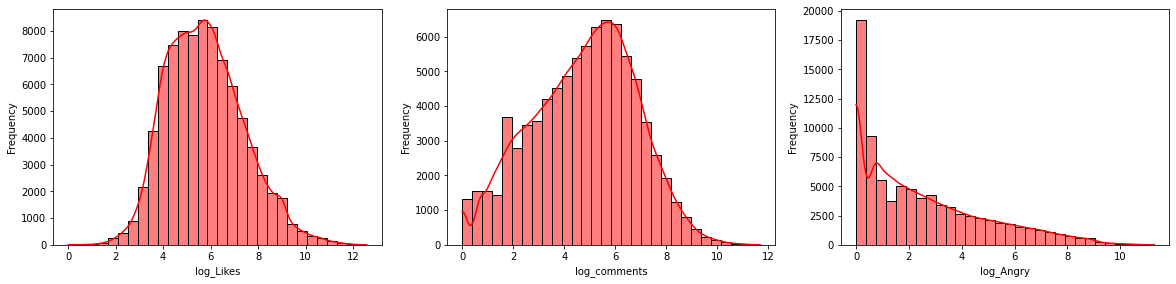

In [14]:
plt.figure(figsize=(20, 20))

for e, column in enumerate(['log_Likes', 'log_comments', 'log_Angry']):
    plt.subplot(4, 3, e + 1)
    sns.histplot(df2[column],bins=30,color="r", kde=True)
    plt.ylabel('Frequency')

### Run Regressions on Both Full Data and Subgroups

In [15]:
liberal_data = df2[df2['LNC_category'] == 'liberal']
neutral_data = df2[df2['LNC_category'] == 'neutral']
conservative_data = df2[df2['LNC_category'] == 'conservative']
science_data = df2[df2['LNC_category'] == 'science']

In [16]:
# For full sample
full_sample = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + Followers_at_Posting+\
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + C(PN) + C(LNC_category)",
data = df2.dropna(), groups= "Facebook Id").fit()
print("Model: ", 1)
print(full_sample.summary())

# for sub groups
i = 2
Models_1 =[]
for df in [liberal_data, neutral_data, conservative_data, science_data]:
    model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + Followers_at_Posting+\
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + C(PN)",
    data = df.dropna(), groups= "Facebook Id").fit()
    Models_1.append(model)
    print("Model: ", i)
    print(model.summary())
    i+=1
    #Model 1: full sample 
    #Model 2: liberal
    #Model 3: conservative
    #Model 4: neutral 
    #Model 5: science channel 

Model:  1
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes  
No. Observations:       61463         Method:                   REML       
No. Groups:             39            Scale:                    1.3962     
Min. group size:        1             Log-Likelihood:           -97599.2615
Max. group size:        17753         Converged:                Yes        
Mean group size:        1576.0                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        5.276    0.802   6.575 0.000  3.703  6.848
C(Type)[T.Live Video Complete]  -1.162    0.101 -11.536 0.000 -1.359 -0.964
C(Type)[T.Live Video Scheduled] -1.400    0.147  -9.532 0.000 -1.688 -1.112
C(Type)[T.Native Vide

In [ ]:
print('Model 1')
print(summary_col([full_sample],stars=True))
i = 2
from statsmodels.iolib.summary2 import summary_col

for reg in Models_1:
    print("Model: ", i)
    print(summary_col([reg],stars=True))
    i +=1

In [17]:
# For full sample
full_sample = smf.mixedlm("log_comments ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + Followers_at_Posting+\
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + C(PN) + C(LNC_category)",
data = df2.dropna(), groups= "Facebook Id").fit()
print("Model: ", 1)
print(model.summary())
    
# for sub-groups    
i = 2
Models_2 = []
for df in [liberal_data, neutral_data, conservative_data, science_data]:
    model = smf.mixedlm("log_comments ~ care_p + fairness_p + loyalty_p+authority_p +  sanctity_p + Followers_at_Posting+\
                        Post_Created_Month+ Page_Created_Month + word_count  + C(Type) + C(PN)",
    data = df.dropna(), groups= "Facebook Id").fit()
    Models_2.append(model)
    print("Model: ", i)
    print(model.summary())
    i+=1
    #Model 1: full sample 
    #Model 2: liberal
    #Model 3: conservative
    #Model 4: neutral 
    #Model 5: science channel 

Model:  1
                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes 
No. Observations:       4285          Method:                   REML      
No. Groups:             23            Scale:                    0.9017    
Min. group size:        1             Log-Likelihood:           -5929.1844
Max. group size:        1969          Converged:                Yes       
Mean group size:        186.3                                             
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                        3.917    0.725  5.403 0.000  2.496  5.338
C(Type)[T.Live Video Complete]  -0.442    0.321 -1.378 0.168 -1.071  0.187
C(Type)[T.Live Video Scheduled] -1.413    0.363 -3.892 0.000 -2.124 -0.701
C(Type)[T.Native Video]          0

In [18]:
print('Model 1')
print(summary_col([full_sample],stars=True))
i = 2
for reg in Models_2:
    print("Model: ", i)
    print(summary_col([reg],stars=True))
    i +=1

Model 1

                                log_comments
--------------------------------------------
Intercept                       5.4394***   
                                (0.6940)    
C(Type)[T.Live Video Complete]  -0.5531***  
                                (0.1171)    
C(Type)[T.Live Video Scheduled] -1.1104***  
                                (0.1708)    
C(Type)[T.Native Video]         -0.2051***  
                                (0.0236)    
C(Type)[T.Photo]                0.3583***   
                                (0.0389)    
C(Type)[T.Status]               -0.1468     
                                (0.2412)    
C(Type)[T.Video]                -0.3614**   
                                (0.1652)    
C(Type)[T.YouTube]              -1.3162**   
                                (0.6297)    
C(PN)[T.P]                      0.1360***   
                                (0.0201)    
C(LNC_category)[T.liberal]      -1.2418*    
                                (0.6789)    
C

In [19]:
# For full sample
full_sample = smf.mixedlm("log_Angry ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + Followers_at_Posting+\
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + C(PN) + C(LNC_category)",
data = df2.dropna(), groups= "Facebook Id").fit()
print("Model: ", 1)
print(full_sample.summary())
    
# for sub-groups    
i = 2
Models_3 = []
for df in [liberal_data, neutral_data, conservative_data, science_data]:
    model = smf.mixedlm("log_Angry ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + Followers_at_Posting+\
                        Post_Created_Month+ Page_Created_Month  + word_count  +  C(Type) + C(PN)",
    data = df.dropna(), groups= "Facebook Id").fit()
    Models_3.append(model)
    print("Model: ", i)
    print(model.summary())
    i+=1
    #Model 1: full sample 
    #Model 2: liberal
    #Model 3: conservative
    #Model 4: neutral 
    #Model 5: science channel 

Model:  1
                   Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      log_Angry   
No. Observations:        61463        Method:                  REML        
No. Groups:              39           Scale:                   3.7734      
Min. group size:         1            Log-Likelihood:          -128142.3395
Max. group size:         17753        Converged:               Yes         
Mean group size:         1576.0                                            
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        1.357    1.299   1.045 0.296 -1.188  3.903
C(Type)[T.Live Video Complete]  -1.060    0.166  -6.403 0.000 -1.385 -0.736
C(Type)[T.Live Video Scheduled] -1.318    0.241  -5.459 0.000 -1.792 -0.845
C(Type)[T.Native Vide

### Intercept and P-values for sub-group Regression 3:

In [20]:
print('Model 1')
print(summary_col([full_sample],stars=True))
i = 2
for reg in Models_3:
    print("Model: ", i)
    
    print(summary_col([reg],stars=True))
    i +=1

Model 1

                                log_Angry 
------------------------------------------
Intercept                       1.3575    
                                (1.2985)  
C(Type)[T.Live Video Complete]  -1.0605***
                                (0.1656)  
C(Type)[T.Live Video Scheduled] -1.3182***
                                (0.2415)  
C(Type)[T.Native Video]         -0.4723***
                                (0.0333)  
C(Type)[T.Photo]                0.0912*   
                                (0.0550)  
C(Type)[T.Status]               -0.4279   
                                (0.3413)  
C(Type)[T.Video]                -0.3011   
                                (0.2336)  
C(Type)[T.YouTube]              -0.8142   
                                (0.8933)  
C(PN)[T.P]                      0.1704*** 
                                (0.0284)  
C(LNC_category)[T.liberal]      -1.7236   
                                (1.2752)  
C(LNC_category)[T.neutral]      -2.1602   
  